**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Geovanny Magalhães Novais

---

Engenheiro(a) do conhecimento: Gabriel Olímpio Rocha Leão

---


#Especificação do problema : Redes Bayesianas


# Abrindo o dataframe e análise inicial

* Montando o Google Drive para acessar os dados de entrada

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Importando a database, criando o dataframe

In [ ]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho4/heart.csv')

* Exibindo a descrição das colunas do dataframe.



Coloque aqui o nome das colunas usadas


* Exibindo os dez primeiros usuários do dataframe

In [ ]:
dados.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


* Obtendo o número de linhas e de colunas do dataset

* Contando todos os casos na base de dados

In [ ]:
total = len(dados)
print(total)

299


In [ ]:
dados.shape

(299, 13)

* Contando os casos marcados como sobreviventes na base de dados

In [ ]:
viveram = len(dados.loc[dados['DEATH_EVENT']==0])
print(viveram)

203


* Calculando a porcentagem de presença de casos de sobreviventes, perante o total de pacientes usando da fórmula:
Presença = (Ocorrência*100)/Total

In [ ]:
print ( (viveram*100)/total )

67.89297658862876


Como os casos de sobreviventes ocupam 67% dos pacientes, seria prudente balancear a base de dados, considerando esse fato

## Interpretando o dataframe através de gráficos

* Importando a biblioteca que cria os gráficos





In [ ]:
import matplotlib.pyplot as plt

* Utilizando o Pandas para criar histogramas, das colunas 'creatinine_phosphokinase' e 'serum_sodium'

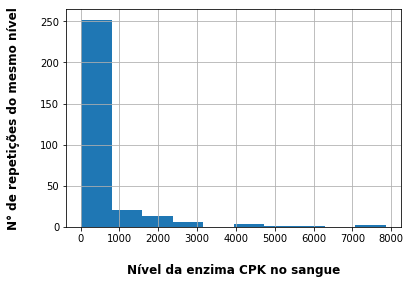

In [ ]:
ax = dados.hist(column='creatinine_phosphokinase')
ax = ax[0]
for x in ax:
    x.set_xlabel("Nível da enzima CPK no sangue", labelpad=20, weight='bold', size=12)
    x.set_ylabel("N° de repetições do mesmo nível", labelpad=20, weight='bold', size=12)
    x.set_title("")
plt.show()

Notamos uma concentração de valores entre Zero e Oitocentos, quanto ao nível de enzimas com quase 250 aparições, enquanto os demais grupos mal contam com 25 aparições.

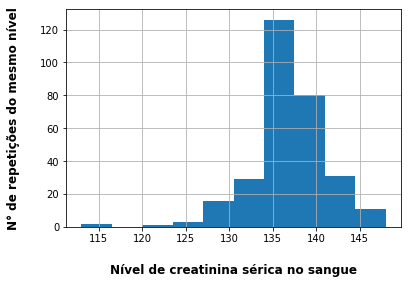

In [ ]:
ax = dados.hist(column='serum_sodium')
ax = ax[0]
for x in ax:
    x.set_xlabel("Nível de creatinina sérica no sangue", labelpad=20, weight='bold', size=12)
    x.set_ylabel("N° de repetições do mesmo nível", labelpad=20, weight='bold', size=12)
    x.set_title("")
plt.show()

Notamos uma concentração de valores entre 134 e 137, com 125 aparições; e em segundo lugar, entre 137 e 141 com 80 aparições, enquanto os demais valores se espalham por uma distribuição normal.

* Criando uma função que retorna uma legenda para gráfico de pizza

In [ ]:
import numpy as np

def func(pct, allvals):
  absolute = int(pct/100*np.sum(allvals))
  return "{:.2f}%\n({:d} pacientes)".format(pct, absolute)

* Criando o gráfico de acordo com o gênero dos pacientes

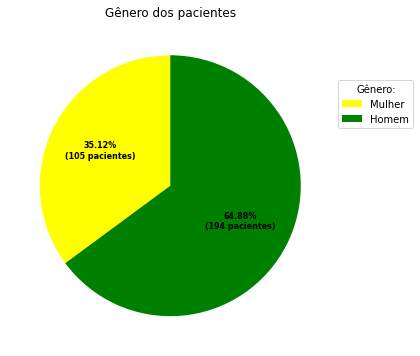

In [ ]:
mulher = len(dados[dados['sex']==0])
homem = len(dados[dados['sex']==1])
nomeGrafico = ['Mulher', 'Homem']
infoGrafico = [mulher, homem]
corGrafico = ("yellow", "green")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="black"))

ax.legend(wedges, nomeGrafico,
          title= "Gênero:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Gênero dos pacientes")

plt.show()

* Criando um gráfico sobre os casos de anemia

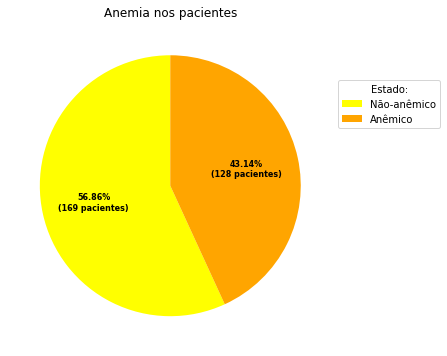

In [ ]:
naoAnemico = len(dados[dados['anaemia']==0])
anemico = len(dados[dados['anaemia']==1])
nomeGrafico = ['Não-anêmico', 'Anêmico']
infoGrafico = [naoAnemico, anemico]
corGrafico = ("yellow", "orange")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="black"))

ax.legend(wedges, nomeGrafico,
          title= "Estado:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Anemia nos pacientes")

plt.show()

* Criando um gráfico sobre pacientes diabéticos ou não

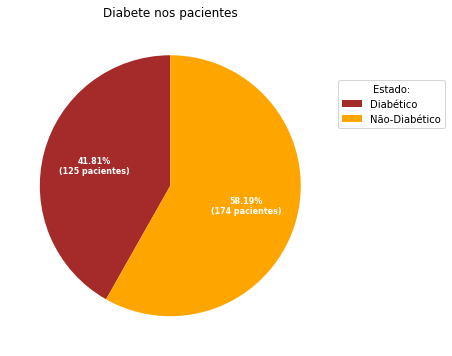

In [ ]:
diabetico = len(dados[dados['diabetes']==1])
naoDiabetico = len(dados[dados['diabetes']==0])
nomeGrafico = ['Diabético', 'Não-Diabético']
infoGrafico = [diabetico, naoDiabetico]
corGrafico = ("brown", "orange")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="w"))

ax.legend(wedges, nomeGrafico,
          title= "Estado:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Diabete nos pacientes")

plt.show()

* Criando um gráfico sobre pacientes com pressão alta ou não

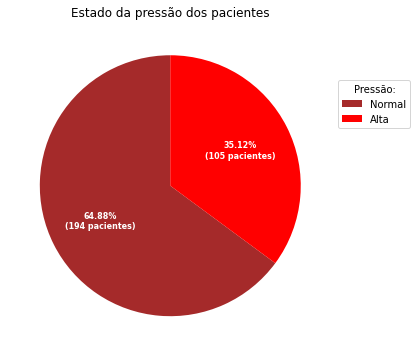

In [ ]:
pressaoNormal = len(dados[dados['high_blood_pressure']==0])
pressaoAlta = len(dados[dados['high_blood_pressure']==1])
nomeGrafico = ['Normal', 'Alta']
infoGrafico = [pressaoNormal, pressaoAlta]
corGrafico = ("brown", "red")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="w"))

ax.legend(wedges, nomeGrafico,
          title= "Pressão:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Estado da pressão dos pacientes")

plt.show()

* Criando um gráfico sobre pacientes fumantes ou não

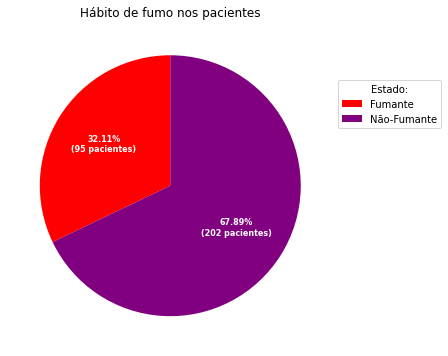

In [ ]:
fumante = len(dados[dados['smoking']==1])
naoFumante = len(dados[dados['smoking']==0])
nomeGrafico = ['Fumante', 'Não-Fumante']
infoGrafico = [fumante, naoFumante]
corGrafico = ("red", "purple")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="w"))

ax.legend(wedges, nomeGrafico,
          title= "Estado:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Hábito de fumo nos pacientes")

plt.show()

* Criando o gráfico dos pacientes que sobreviveram e os que não

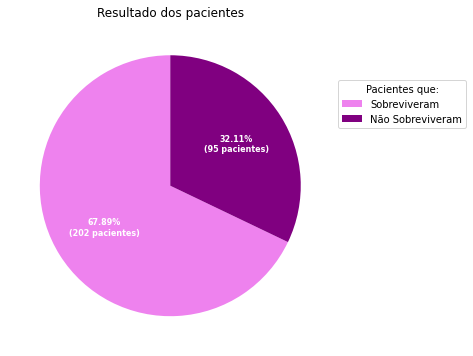

In [ ]:
sobreviveram = len(dados[dados['DEATH_EVENT']==0])
naoSobreviveram = len(dados[dados['DEATH_EVENT']==1])
nomeGrafico = ['Sobreviveram', 'Não Sobreviveram']
infoGrafico = [sobreviveram, naoSobreviveram]
corGrafico = ("violet", "purple")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(infoGrafico, colors=corGrafico, autopct=lambda pct: func(pct, infoGrafico), startangle=90,
                                  textprops=dict(color="w"))

ax.legend(wedges, nomeGrafico,
          title= "Pacientes que:",
          loc ="center left",
          bbox_to_anchor=(1, 0.75))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Resultado dos pacientes")

plt.show()

* Somando os valores nulos encontrados em cada coluna, para quantificar-los.

In [ ]:
nulos = dados.isnull().sum()
print(nulos)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Notamos que não existem valores nulos na base de dados

## Comparando as colunas e suas relações

* Usando o Pandas para criar uma matriz de dispersão entre as colunas 'time' e 'DEATH_EVENT'

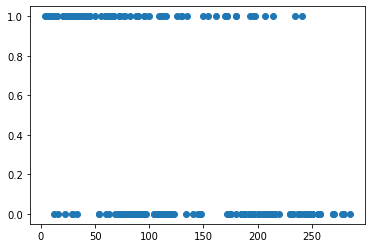

In [ ]:
plt.scatter(dados['time'], dados['DEATH_EVENT'])
plt.show()

Notamos que o número de dias sob acompanhamento não tem relação explícita com o número de sobreviventes.

* Criando heatmap para avaliar o grau de dependência entre cada variável

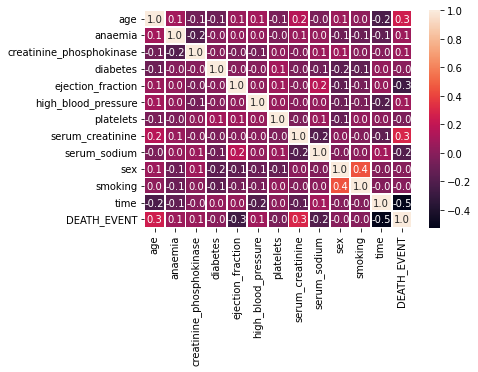

In [ ]:
import seaborn as sn

correlacao = dados.corr()

matrizCorrelacao = sn.heatmap(correlacao, annot = True, fmt='.1f', linewidths=.9)
matrizCorrelacao

* Criando um dataframe que seleciona aleatoriamente 50 pacientes que não sobreviveram

In [ ]:
naoVive = dados[dados['DEATH_EVENT']==1]
naoViveram = naoVive.sample(n=50, random_state= np.random.RandomState(0))
naoViveram.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
29,82.000,0,70,1,30,0,200000.0,1.2,132,1,1,26,1
185,60.667,1,104,1,30,0,389000.0,1.5,136,1,0,171,1
2,65.000,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
65,60.000,0,68,0,20,0,119000.0,2.9,127,1,1,64,1
113,70.000,1,143,0,60,0,351000.0,1.3,137,0,0,90,1


* Criando um dataframe que seleciona aleatoriamente 100 pacientes que sobreviveram

In [ ]:
vive = dados[dados['DEATH_EVENT']==0]
viveram = vive.sample(n=100, random_state= np.random.RandomState(0))
viveram.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
81,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
114,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,91,0
99,63.0,1,61,1,40,0,221000.00,1.10,140,0,0,86,0
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
198,50.0,1,582,1,20,1,279000.00,1.00,134,0,0,186,0


* Criando um dataframe balanceado em 67% (100) pessoas que viveram para 33% (50) pessoas que não sobreviveram, mantendo a proporção dos dados totais originais

In [ ]:
novosDados = pd.merge(viveram, naoViveram, how='outer')
novosDados.head(40-60)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
1,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,91,0
2,63.0,1,61,1,40,0,221000.00,1.10,140,0,0,86,0
3,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
4,50.0,1,582,1,20,1,279000.00,1.00,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,60.0,1,260,1,38,0,255000.00,2.20,132,0,1,45,1
126,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
127,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1
128,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1


* Criando o arquivo csv já balanceado para o outro membro do grupo implementar

In [ ]:
novosDados.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho4/dtCoracao.csv')